In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ast
import json
with open("train-v2.0.json",'r') as f:
    k = json.loads(f.read())

In [13]:
text = k['data'][0]['paragraphs'][1]['context']

In [57]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [34]:
context = nlp(k['data'][0]['paragraphs'][1]['context'])

In [52]:
context

Following the disbandment of Destiny's Child in June 2005, she released her second solo album, B'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar". Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and starring roles in The Pink Panther (2006) and Obsessed (2009). Her marriage to rapper Jay Z and portrayal of Etta James in Cadillac Records (2008) influenced her third album, I Am... Sasha Fierce (2008), which saw the birth of her alter-ego Sasha Fierce and earned a record-setting six Grammy Awards in 2010, including Song of the Year for "Single Ladies (Put a Ring on It)". Beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul. Her critically acclaimed fifth studio album, Beyoncé (2013), was distinguished from previous releases by its experimental production and exploration o

In [53]:
sentences = [sent.text for sent in context.sents]

In [58]:
def set_custom_boundaries(doc):
    for token in doc[:-1]:
        if token.text == "...":
            doc[token.i+1].is_sent_start = False
    return doc

nlp.add_pipe(set_custom_boundaries, before="parser")
doc = nlp(text)
sentences = [sent.text for sent in doc.sents]

In [35]:
print("before:",[sent.text for sent in context.sents])

before: ['Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar".', 'Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and starring roles in The Pink Panther (2006) and Obsessed (2009).', 'Her marriage to rapper Jay Z and portrayal of Etta James in Cadillac Records (2008) influenced her third album, I Am...', 'Sasha Fierce (2008), which saw the birth of her alter-ego Sasha Fierce and earned a record-setting six Grammy Awards in 2010, including Song of the Year for "Single Ladies', '(Put a Ring on It)".', 'Beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul.', 'Her critically acclaimed fifth studio album, Beyoncé (2013), was distinguished from previous releases by its experimenta

In [41]:
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
sentence='I really enjoyed this movie a lot.'
#1.Tokenize the sequence:
tokens=tokenizer.tokenize(sentence)
print(tokens)
print(type(tokens))

['i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.']
<class 'list'>


In [42]:
tokens = ['[CLS]'] + tokens + ['[SEP]']
print(" Tokens are \n {} ".format(tokens))

 Tokens are 
 ['[CLS]', 'i', 'really', 'enjoyed', 'this', 'movie', 'a', 'lot', '.', '[SEP]'] 


In [40]:
tokens = [token.text for token in doc]

In [67]:
questions = k['data'][0]['paragraphs'][1]['qas']

In [72]:
ques = [i['question'] for i in questions]

In [74]:
ques

['After her second solo album, what other entertainment venture did Beyonce explore?',
 'Which artist did Beyonce marry?',
 'To set the record for Grammys, how many did Beyonce win?',
 'For what movie did Beyonce receive  her first Golden Globe nomination?',
 'When did Beyonce take a hiatus in her career and take control of her management?',
 'Which album was darker in tone from her previous work?',
 'After what movie portraying Etta James, did Beyonce create Sasha Fierce?',
 "When did Destiny's Child end their group act?",
 "What was the name of Beyoncé's second solo album?",
 "What was Beyoncé's first acting job, in 2006?",
 'Who is Beyoncé married to?',
 "What is the name of Beyoncé's alter-ego?"]

In [6]:
with open("dev-v2.0.json",'r') as f:
    dev =  f.readlines()

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/harshit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
import torch

In [96]:
from InferSent.models import InferSent
V = 2
MODEL_PATH = 'encoder/infersent%s.pkl' % V
params_model = {'bsize': 1, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': V}
infersent = InferSent(params_model)
infersent.load_state_dict(torch.load(MODEL_PATH))

<All keys matched successfully>

In [97]:
W2V_PATH = 'fastText/crawl-300d-2M.vec'
infersent.set_w2v_path(W2V_PATH)

In [98]:
infersent.build_vocab(sentences, tokenize=True)

Found 124(/128) words with w2v vectors
Vocab size : 124


In [76]:
sentences

['Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar".',
 'Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and starring roles in The Pink Panther (2006) and Obsessed (2009).',
 'Her marriage to rapper Jay Z and portrayal of Etta James in Cadillac Records (2008) influenced her third album, I Am... Sasha Fierce (2008), which saw the birth of her alter-ego Sasha Fierce and earned a record-setting six Grammy Awards in 2010, including Song of the Year for "Single Ladies',
 '(Put a Ring on It)".',
 'Beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul.',
 'Her critically acclaimed fifth studio album, Beyoncé (2013), was distinguished from previous releases by its experimental prod

In [92]:
sentences

['Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar".',
 'Beyoncé also ventured into acting, with a Golden Globe-nominated performance in Dreamgirls (2006), and starring roles in The Pink Panther (2006) and Obsessed (2009).',
 'Her marriage to rapper Jay Z and portrayal of Etta James in Cadillac Records (2008) influenced her third album, I Am... Sasha Fierce (2008), which saw the birth of her alter-ego Sasha Fierce and earned a record-setting six Grammy Awards in 2010, including Song of the Year for "Single Ladies',
 '(Put a Ring on It)".',
 'Beyoncé took a hiatus from music in 2010 and took over management of her career; her fourth album 4 (2011) was subsequently mellower in tone, exploring 1970s funk, 1980s pop, and 1990s soul.',
 'Her critically acclaimed fifth studio album, Beyoncé (2013), was distinguished from previous releases by its experimental prod

In [101]:
embeddings_sen = infersent.encode(sentences, tokenize=True)

In [102]:
embeddings_sen.shape

(6, 4096)

In [93]:
ques

['After her second solo album, what other entertainment venture did Beyonce explore?',
 'Which artist did Beyonce marry?',
 'To set the record for Grammys, how many did Beyonce win?',
 'For what movie did Beyonce receive  her first Golden Globe nomination?',
 'When did Beyonce take a hiatus in her career and take control of her management?',
 'Which album was darker in tone from her previous work?',
 'After what movie portraying Etta James, did Beyonce create Sasha Fierce?',
 "When did Destiny's Child end their group act?",
 "What was the name of Beyoncé's second solo album?",
 "What was Beyoncé's first acting job, in 2006?",
 'Who is Beyoncé married to?',
 "What is the name of Beyoncé's alter-ego?"]

In [99]:
embeddings_que = infersent.encode(ques, tokenize=True)

In [100]:
embeddings_que.shape

(12, 4096)

In [111]:
from sklearn.metrics.pairwise import cosine_similarity
n = len(embeddings_que)
m = len(embeddings_sen)
matrix_init = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_init[i][j] = cosine_similarity([embeddings_que[i]],[embeddings_sen[j]])

In [112]:
matrix_init

array([[ 0.26886857,  0.18169624,  0.19226436,  0.26925308,  0.25114834,
         0.31047827],
       [-0.46983922, -0.39447016, -0.54249024,  0.39360416, -0.47201973,
        -0.39869013],
       [-0.31633043, -0.24277546, -0.37323871,  0.49133176, -0.3175588 ,
        -0.24188414],
       [-0.17520729, -0.09200592, -0.19811213,  0.39452311, -0.2084578 ,
        -0.13248649],
       [ 0.30706447,  0.27417761,  0.30264822,  0.19466063,  0.46163625,
         0.31660271],
       [ 0.29019326,  0.25276762,  0.26012439,  0.18484715,  0.39934981,
         0.44402361],
       [ 0.13468009,  0.19776177,  0.16652209,  0.28657201,  0.06189447,
         0.0899407 ],
       [-0.02487705, -0.06898464, -0.13219421,  0.36372688, -0.16181348,
        -0.09804906],
       [ 0.39871264,  0.38431251,  0.36791348,  0.19169304,  0.41468263,
         0.4533338 ],
       [ 0.40685624,  0.56788784,  0.37641221,  0.22255296,  0.45039952,
         0.38977635],
       [-0.12773025,  0.04044614, -0.12755425,  0.

In [134]:
x = np.linspace( -5, 5, 1000 )

In [136]:
y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )

In [135]:
x

array([-5.        , -4.98998999, -4.97997998, -4.96996997, -4.95995996,
       -4.94994995, -4.93993994, -4.92992993, -4.91991992, -4.90990991,
       -4.8998999 , -4.88988989, -4.87987988, -4.86986987, -4.85985986,
       -4.84984985, -4.83983984, -4.82982983, -4.81981982, -4.80980981,
       -4.7997998 , -4.78978979, -4.77977978, -4.76976977, -4.75975976,
       -4.74974975, -4.73973974, -4.72972973, -4.71971972, -4.70970971,
       -4.6996997 , -4.68968969, -4.67967968, -4.66966967, -4.65965966,
       -4.64964965, -4.63963964, -4.62962963, -4.61961962, -4.60960961,
       -4.5995996 , -4.58958959, -4.57957958, -4.56956957, -4.55955956,
       -4.54954955, -4.53953954, -4.52952953, -4.51951952, -4.50950951,
       -4.4994995 , -4.48948949, -4.47947948, -4.46946947, -4.45945946,
       -4.44944945, -4.43943944, -4.42942943, -4.41941942, -4.40940941,
       -4.3993994 , -4.38938939, -4.37937938, -4.36936937, -4.35935936,
       -4.34934935, -4.33933934, -4.32932933, -4.31931932, -4.30

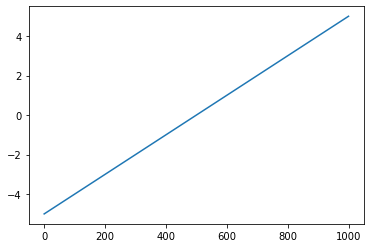

In [139]:
plt.plot(x)

In [148]:
embeddings_sen[0]

array([ 0.00746889, -0.06522691,  0.17579785, ...,  0.03920722,
        0.05661292,  0.00816607], dtype=float32)

(array([5.000e+00, 4.500e+01, 9.790e+02, 2.252e+03, 6.190e+02, 1.430e+02,
        3.300e+01, 1.200e+01, 6.000e+00, 2.000e+00]),
 array([-0.14583872, -0.0978202 , -0.04980167, -0.00178315,  0.04623538,
         0.09425391,  0.14227243,  0.19029096,  0.23830949,  0.28632802,
         0.33434653], dtype=float32),
 <a list of 10 Patch objects>)

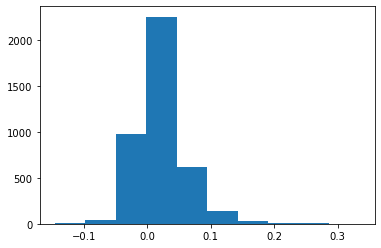

In [146]:
plt.hist(embeddings_sen[0])

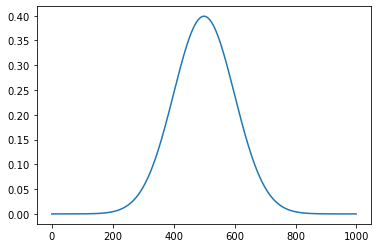

In [138]:
plt.plot(y)

(array([   5.,   25.,  195.,  857., 2211., 2961., 2423., 1013.,  281.,
          29.]),
 array([-8.6473979 , -7.10117288, -5.55494787, -4.00872285, -2.46249783,
        -0.91627281,  0.6299522 ,  2.17617722,  3.72240224,  5.26862725,
         6.81485227]),
 <a list of 10 Patch objects>)

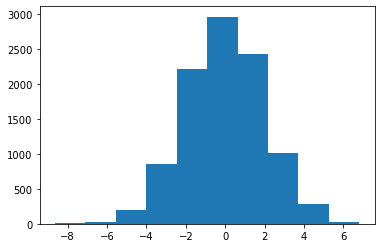

In [144]:
plt.hist(np.random.normal(0, 2, 10000))

In [140]:
print(skew(y))
print(kurtosis(y))

1.1108237139164436
-0.3073930877422071


In [133]:
from scipy.stats import skew,kurtosis
print(skew(embeddings_sen[0]))
print(kurtosis(embeddings_sen[0]))

1.5017451047897339
5.92638529218863


In [125]:
from scipy.spatial.distance import cosine

In [129]:
cosine(embeddings_que[1],embeddings_sen[5])

1.3986901938915253

In [120]:
ques[3]

'For what movie did Beyonce receive  her first Golden Globe nomination?'

In [118]:
sentences[0]

'Following the disbandment of Destiny\'s Child in June 2005, she released her second solo album, B\'Day (2006), which contained hits "Déjà Vu", "Irreplaceable", and "Beautiful Liar".'

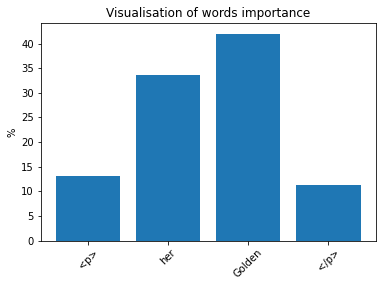

(tensor([[ 0.0181, -0.1244,  0.1721,  ..., -0.0553,  0.0081, -0.0103]],
        grad_fn=<MaxBackward0>),
 array([[1, 1, 2, ..., 1, 2, 2]]))

In [124]:
infersent.visualize('For what movie did Beyonce receive  her first Golden Globe nomination?', tokenize=True)

In [1]:
import spacy

In [6]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForQuestionAnswering

In [7]:
model = AutoModelForQuestionAnswering.from_pretrained("bert-large-uncased-whole-word-masking-finetuned-squad")

OSError: Can't load config for 'bert-large-uncased-whole-word-masking-finetuned-squad'. Make sure that:

- 'bert-large-uncased-whole-word-masking-finetuned-squad' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'bert-large-uncased-whole-word-masking-finetuned-squad' is the correct path to a directory containing a config.json file



In [5]:
nlp = pipeline("question-answering")

OSError: Can't load config for 'distilbert-base-cased'. Make sure that:

- 'distilbert-base-cased' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'distilbert-base-cased' is the correct path to a directory containing a config.json file



In [3]:
context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

In [4]:
print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))

NameError: name 'nlp' is not defined

In [143]:
class Solution:
    """
    @param nums: The integer array.
    @param target: Target to find.
    @return: The first position of target. Position starts from 0.
    """
#     def binarySearch(self, nums, target):
#         for j,i in enumerate(nums):
#             if target==i:
#                 return j
#             if j+1==len(nums):
#                 return -1
#         # write your code here
        
    def binarySearch(self, nums, target):
        n = len(nums)
        print(self.first(nums,0,n-1,target,n))
        print(2)
        
        
        
        
    def first(self,nums,low,high,target,n):
        
        if(high>=low):
            mid = low + (high - low)//2
            print(mid)
            if ((mid==0 or target>nums[mid-1]) and (target==nums[mid])):
#                 print(435)
                return mid
            elif target>nums[mid]:
                return self.first(nums,mid+1,high,target,n)
            else:
                return self.first(nums,low,mid-1,target,n)
#             print(-1)
#         return -1

In [152]:
def binarySearch(nums, target):
    n = len(nums)
    print(nums)
    print(nums[3])
    k = first(nums,0,n-1,target,n)
    print(k)




def first(nums,low,high,target,n):

    if(high>=low):
        mid = low + (high - low)//2
        print(mid)
        if ((mid==0 or target>nums[mid-1]) and (target==nums[mid])):
            print(435)
            return mid
        elif target>nums[mid]:
            return first(nums,mid+1,high,target,n)
        else:
            return first(nums,low,mid-1,target,n)
        
        
def last(nums,low,high,target,n):

    if(high>=low):
        mid = low + (high - low)//2
        print(mid)
        if ((mid==0 or target<nums[mid+1]) and (target==nums[mid])):
            print(435)
            return mid
        elif target<nums[mid]:
            return first(nums,low,mid-1,target,n)
        else:
            return first(nums,mid+1,high,target,n)

In [170]:
def maxSubArray(nums):
    n = len(nums)
    maximum = max([max([sum(nums[j:j+i+1]) for j in range(n) if j+i+1<n+1]) for i in range(n)])
    return maximum

In [174]:
def maxSubArray(nums):
    n = len(nums)
    max_ending_here = 0
    max_so_far = 0
    for i in range(n):
        max_ending_here = max_ending_here + nums[i]
        if(max_so_far<max_ending_here):
            max_so_far = max_ending_here
        if (max_ending_here<0):
            max_ending_here = 0
    return max_so_far

def minSubArray(nums):
    n = len(nums)
    max_ending_here = 0
    max_so_far = 0
    for i in range(n):
        max_ending_here = max_ending_here + nums[i]
        if(max_so_far>max_ending_here):
            max_so_far = max_ending_here
        if (max_ending_here>0):
            max_ending_here = 0
            
    if max_so
    return max_so_far

In [177]:
from sys import maxint
print(-maxint - 1)

ImportError: cannot import name 'maxint' from 'sys' (unknown location)

In [179]:
maxSubArray(nums)

0

In [175]:
minSubArray(nums)

-5

In [178]:
nums = [-2,-3,-1,-5]

In [171]:
maxSubArray(nums)

6

In [160]:
max([1,2,3,5])

5

In [155]:
x=17

In [156]:
arr = [2,2,3,4,5,6,8,13,17,18]

In [146]:
n

10

In [157]:
k = first(arr,0,n-1,x,n)

4
7
8
435


In [158]:
k

8

In [153]:
k = last(arr,0,n-1,x,n)

4
435


In [154]:
k

4

In [124]:
binarySearch([1,2,3,4,5,5,6,7,8,9,10],5)

[1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10]
4
None


In [107]:
a = Solution()

In [108]:
k = a.binarySearch([1,2,3,4,5,5,6,7,8,9,10],5)

5
2
3
4
None
2


In [109]:
k

In [125]:
def first(arr, low, high, x, n) : 
    if(high >= low) : 
        mid = low + (high - low) // 2
        if( ( mid == 0 or x > arr[mid - 1]) and arr[mid] == x) : 
            return mid 
        elif(x > arr[mid]) : 
            return first(arr, (mid + 1), high, x, n) 
        else : 
            return first(arr, low, (mid - 1), x, n) 
      
    return -1
  
  
# if x is present in arr[] then  
# returns the index of LAST occurrence 
# of x in arr[0..n-1], otherwise 
# returns -1  
def last(arr, low, high, x, n) : 
    if (high >= low) : 
        mid = low + (high - low) // 2
        if (( mid == n - 1 or x < arr[mid + 1]) and arr[mid] == x) : 
            return mid 
        elif (x < arr[mid]) : 
            return last(arr, low, (mid - 1), x, n) 
        else : 
            return last(arr, (mid + 1), high, x, n) 
              
    return -1
      
  
# Driver program 
arr = [1, 2, 2, 2, 2, 3, 4, 7, 8, 8] 
n = len(arr) 
  
x = 8
print("First Occurrence = ", 
      first(arr, 0, n - 1, x, n)) 
print("Last Occurrence = ", 
      last(arr, 0, n - 1, x, n)) 

First Occurrence =  8
Last Occurrence =  9


In [180]:
ls = [2,1,7,3,4,5]

In [181]:
ls.sort()

In [182]:
ls

[1, 2, 3, 4, 5, 7]

In [183]:
-1//2

-1

In [185]:
([1] + [1]).sort()

In [190]:
def mergeSortedArray(A, B):
    ls = []
    j = 0
    i = 0
    n = len(A)
    m = len(B)

    while(i<n or j<m):
#         min_b = min(B[j:])
        v_a = A[i]
        v_b = B[j]
        if((v_a<=v_b) & (i<n)):
            ls.append(v_a)
            i+=1
        if((v_a>=v_b) & (i<n)):
            ls.append(v_b)
            j+=1
        if(i==n & j<m):
            ls.append(v_b)
            j+=1
        if(j==m & i<n):
            ls.append(v_a)
            i+=1


    return ls

In [191]:
mergeSortedArray([1],[1])

IndexError: list index out of range

In [192]:
arr = [1,1,2]

In [195]:
arr.count(1)

2

In [197]:
arr.extend([1])

In [198]:
arr

[1, 1, 2, 1]

In [201]:
def removeDuplicates(nums):
    n = len(nums)

    return len(set(nums))

In [202]:
removeDuplicates([-14,-14,-13,-13,-13,-13,-13,-13,-13,-12,-12,-12,-12,-11,-10,-9,-9,-9,-8,-7,-5,-5,-5,-5,-4,-3,-3,-2,-2,-2,-2,-1,-1,-1,-1,-1,0,1,1,1,1,2,2,2,3,3,3,4,4,4,4,5,5,5,6,6,6,6,7,8,8,8,9,9,9,10,10,10,11,11,11,12,12,12,13,14,14,14,14,15,16,16,16,18,18,18,19,19,19,19,20,20,20,21,21,21,21,21,21,22,22,22,22,22,23,23,24,25,25])

38

In [204]:
def removeDuplicates(arr, n): 
  
    # Return, if array is  
    # empty or contains 
    # a single element 
    if n == 0 or n == 1: 
        return n 
  
    temp = list(range(n)) 
  
    # Start traversing elements 
    j = 0; 
    for i in range(0, n-1): 
  
        # If current element is 
        # not equal to next 
        # element then store that 
        # current element 
        if arr[i] != arr[i+1]: 
            temp[j] = arr[i] 
            j += 1
  
    # Store the last element 
    # as whether it is unique 
    # or repeated, it hasn't 
    # stored previously 
    temp[j] = arr[n-1] 
    j += 1
      
    # Modify original array 
    for i in range(0, j): 
        arr[i] = temp[i] 
  
    return j 
  
# Driver code 
arr = [1, 2, 2, 3, 4, 4, 4, 5, 5,2,2,2] 
n = len(arr) 
  
# removeDuplicates() returns 
# new size of array. 
n = removeDuplicates(arr, n) 
  
# Print updated array 
for i in range(n): 
    print ("%d"%(arr[i]), end = " ")

1 2 3 4 5 2 

In [5]:
from owlready2 import *

In [9]:
onto = get_ontology("http://test.org/onto.owl")

In [10]:
with onto:
    class Drug(Thing):
         pass

In [16]:
class DrugAssociation(Drug): # A drug associating several active principles
    pass

In [18]:
print(DrugAssociation.is_a)

[onto.Drug]


In [23]:
print(Drug.subclasses())

<generator object EntityClass.subclasses at 0x7f7b52537b50>


In [20]:
DrugAssociation.ancestors()

{onto.Drug, onto.DrugAssociation, owl.Thing}

In [26]:
list(onto.classes())

[onto.Drug, onto.DrugAssociation]

In [11]:
Drug.iri

'http://test.org/onto.owl#Drug'

In [12]:
onto.load()

get_ontology("http://test.org/onto.owl#")